## Based on Proximity Regression for Real Time Prediction

In this project, we will develop an algorithm that uses proximity measures to perform real-time forecasting.

The algorithm will be based on the nearest neighbor approach.                                                   
The predicted value for a new data point is based on the values of its k-nearest neighbors in the training data.  
To measure proximity between data points, you will use a combination of Minkowski distance and cosine similarity. 


In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [80]:
import warnings
warnings.filterwarnings('ignore')

*DATA SOURCE* : 

https://finance.yahoo.com/quote/TSLA/history?p=TSLA


In [2]:
# Loading the Dataset
df = pd.read_csv(r'/Users/rasikagulhane/Downloads/TSLA.csv', index_col=0)

In [3]:
print(df.shape)
print(df.head())

(2768, 6)
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2012-04-23  2.190667  2.198000  2.114000  2.129333   2.129333  13362000
2012-04-24  2.121333  2.146667  2.066667  2.121333   2.121333  10117500
2012-04-25  2.138000  2.199333  2.138000  2.194000   2.194000  10683000
2012-04-26  2.197333  2.234667  2.194000  2.232667   2.232667   6379500
2012-04-27  2.240000  2.242000  2.194000  2.222667   2.222667   8865000


<Axes: >

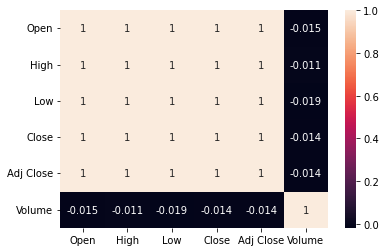

In [36]:
sns.heatmap(df.corr(), annot= True)

In [44]:
df=df.drop(['Adj Close','Volume'], axis=1)

In [45]:
# Splitting Data into Training and Testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [46]:
print(train_data.shape)
print(test_data.shape)

(2214, 4)
(554, 4)


In [47]:
test_data.tail(5)

,Open,High,Low,Close
Date,,,,
2023-04-17,186.320007,189.690002,182.690002,187.039993
2023-04-18,187.149994,187.690002,183.580002,184.309998
2023-04-19,179.100006,183.500000,177.649994,180.589996
2023-04-20,166.169998,169.699997,160.559998,162.990005
2023-04-21,164.800003,166.000000,161.320007,165.080002


In [48]:
# Defining Functions for Distance Metrics
def minkowski_distance(x, y, p):
    return np.sum(np.abs(x - y) ** p) ** (1/p)

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

*implementation of KNN*
- KNN regression steps implemented as below:
- Closer neighbors are weighted more heavily than farther neighbors

In [49]:
for index, row in train_data.iterrows():
    print(index,row)
    break

2012-04-23 Open     2.190667
High     2.198000
Low      2.114000
Close    2.129333
Name: 2012-04-23, dtype: float64


In [90]:
def predict(train_data, test_instance, k, p):
    distances = []
    
    for index, row in train_data.iterrows():
        dist = minkowski_distance(row[:-1], test_instance, p)
        distances.append((dist, index))
        
    distances.sort()
    neighbors = distances[:k]
    total_weight = 0
    weighted_sum = 0
    
    for neighbor in neighbors:
        weight = 1/neighbor[0]
        total_weight += weight
        weighted_sum += weight * train_data.loc[neighbor[1], 'Close']
        
    return weighted_sum/total_weight

In [91]:

# Defining Function for Evaluating the Model
def evaluate(train_data, test_data, k, p):
    predictions = []
    for index, row in test_data.iterrows():
        predictions.append(predict(train_data, row[:-1], k, p))
    rmse = math.sqrt(np.mean((test_data['Close'].values - predictions)**2))
    return rmse


In [102]:
# Evaluating the Model for Different Values of k and p
k_values = [1, 5, 10, 15]
p_values = [1, 2, 3]
for k in k_values:
    for p in p_values:
        rmse = evaluate(train_data, test_data, k, p)
        print(f"k={k}, p={p}: RMSE={rmse}")

k=1, p=1: RMSE=25.284343743475663
k=1, p=2: RMSE=25.23276511310601
k=1, p=3: RMSE=25.206082617195474
k=5, p=1: RMSE=26.909292032860407
k=5, p=2: RMSE=26.868706438815153
k=5, p=3: RMSE=26.85549685383074
k=10, p=1: RMSE=27.534553744703846
k=10, p=2: RMSE=27.520537134207917
k=10, p=3: RMSE=27.508846401032805
k=15, p=1: RMSE=28.457561321773237
k=15, p=2: RMSE=28.458855819423242
k=15, p=3: RMSE=28.454892590447923


In [ ]:
rmse= evaluate(train_data, test_data, 5, 2)

### Same task with KNN inbuilt library:

In [53]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsRegressor

print(df.columns)
# Splitting Data into Training and Testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Defining Function for Evaluating the Model
def evaluate_knn(train_data, test_data, k, p):
    knn = KNeighborsRegressor(n_neighbors=k, p=p)
    knn.fit(train_data.iloc[:, :-1], train_data['Close'])
    predictions = knn.predict(test_data.iloc[:, :-1])
    rmse = math.sqrt(np.mean((test_data['Close'].values - predictions)**2))
    return rmse

# Evaluating the Model for Different Values of k and p
k_values = [1, 3, 5, 7, 9]
p_values = [1, 2, 3]
for k in k_values:
    for p in p_values:
        rmse = evaluate_knn(train_data, test_data, k, p)
        print(f"k={k}, p={p}: RMSE={rmse}")


Index(['Open', 'High', 'Low', 'Close'], dtype='object')
k=1, p=1: RMSE=25.284343743475663
k=1, p=2: RMSE=25.23276511310601
k=1, p=3: RMSE=25.206082617195474
k=3, p=1: RMSE=27.27550842869655
k=3, p=2: RMSE=27.197117667323713
k=3, p=3: RMSE=27.153217776188576
k=5, p=1: RMSE=27.010258526634583
k=5, p=2: RMSE=26.973098805957427
k=5, p=3: RMSE=26.955021426085317
k=7, p=1: RMSE=26.77006379841713
k=7, p=2: RMSE=26.73319000215743
k=7, p=3: RMSE=26.745355362127526
k=9, p=1: RMSE=27.568309630020142
k=9, p=2: RMSE=27.531714498292
k=9, p=3: RMSE=27.50989174514633


### Check prediction of target close value for new data

In [67]:
import pandas as pd

df1 = pd.DataFrame()
df1['Open'] = [1.718000e+02]
df1['High'] = [1.730000e+02]
df1['Low'] = [1.699200e+02]
df1['Close'] = [np.nan]
# df1['Adj Close '] = [1.720800e+02]
# df1['Volume'] = [1.033523e+08]
df1.columns = [['Open', 'High', 'Low', 'Close']]

print(df1.head())


    Open   High     Low Close
0  171.8  173.0  169.92   NaN


In [74]:
new_data= df1
new_data

,Open,High,Low,Close
0,171.8,173.0,169.92,NaN


In [95]:
# Create a new data row
new_data_row = pd.Series([120, 130, 118, 125])

# Remove the 'Close' column from the new data row
new_data_row_without_close = new_data_row[:-1]

# Set the values of k and p
k = 5
p = 2

# Use the 'predict' function to predict the close value for the new data row
predicted_close_value = predict(train_data, new_data_row_without_close, k, p)

print(f"Predicted Close Value: {predicted_close_value}")


Predicted Close Value: nan


In [88]:
X_new = new_data.iloc[:, :-1].values
X_new

array([[171.8 , 173.  , 169.92]])

**Predicting target 'Close value' of new data row with predicted function created**

In [96]:
# # Split new data into features and target variable
# X_new = new_data.iloc[:, :-1].values
# y_new= new_data['Close']

# # new_data_row_without_close = new_data[:-1]

# # Set the values of k and p
# k = 5
# p = 2

# # Use the 'predict' function to predict the close value for the new data row
# predicted_close_value = predict(train_data, X_new, k, p)

# print(f"Predicted Close Value: {predicted_close_value}")


**Predicting target 'Close value' of new data row with KNN**

In [75]:
knn = KNeighborsRegressor(n_neighbors=5, p=2)
knn.fit(train_data.iloc[:, :-1], train_data['Close'])

KNeighborsRegressor()

In [77]:
# Split new data into features and target variable
X_new = new_data.iloc[:, :-1].values
y_new= new_data['Close']

predictions = []
for index, row in test_data.iterrows():
        predictions.append(predict(train_data, row[:-1], 5, 2))

# Predicting the Close value for new data
y_new_pred = knn.predict(X_new)

# Printing the predicted values
print(y_new_pred)


[169.410669]


/Users/rasikagulhane/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### dendogram for better understanding of dataset

In [101]:
train_data

,Open,High,Low,Close
Date,,,,
2012-04-23,2.190667,2.198000,2.114000,2.129333
2012-04-24,2.121333,2.146667,2.066667,2.121333
2012-04-25,2.138000,2.199333,2.138000,2.194000
2012-04-26,2.197333,2.234667,2.194000,2.232667
2012-04-27,2.240000,2.242000,2.194000,2.222667
...,...,...,...,...
2021-02-02,281.559998,293.500000,280.733337,290.929993
2021-02-03,292.339996,292.693329,284.353333,284.896667
2021-02-04,285.000000,285.500000,277.806671,283.329987


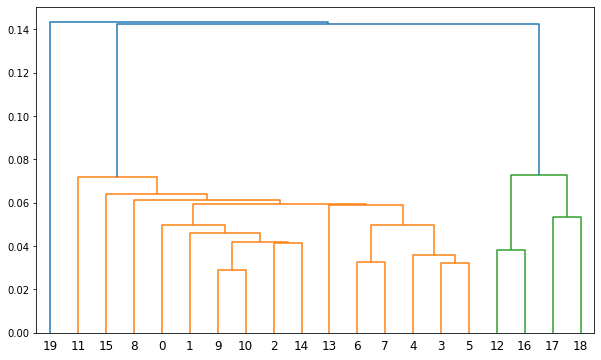

In [97]:
# Clustering the train Data Points based on their Distance
Z = linkage(train_data.head(20).iloc[:, :-1].values, method='single')
fig = plt.figure(figsize=(10, 6))
dn = dendrogram(Z)

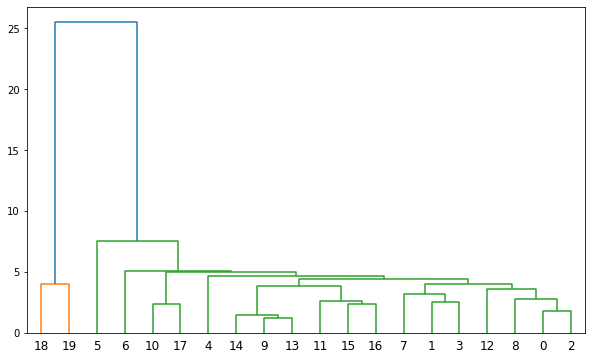

In [100]:
# Clustering the test Data Points based on their Distance
Z = linkage(test_data.tail(20).iloc[:, :-1].values, method='single')
fig = plt.figure(figsize=(10, 6))
dn = dendrogram(Z)